# IMPORT

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

# DEFINE

In [219]:
NUM_OF_ROWS = 43732

# PREPARETION

In [220]:
flats = pd.read_csv('data/flats.csv',
                    dtype={'floors': str,
                           'total_floors': str})

In [221]:
flats.head(10)

,page,flat_type,object_type,rooms,floors,square,kitchen_square,live_square,price,build_matireal,catalog_id,district_rating,underground,total_floors,days_active,metro_station,district
0,https://www.domofond.ru/4-komnatnaya-kvartira-...,Квартира,Новостройка,4,6,157.0,37.4,73.7,68923000.0,Монолит,1671457770,"3,7",605.0,9,527.0,Чернышевская,Центральный
1,https://www.domofond.ru/2-komnatnaya-kvartira-...,Квартира,Новостройка,2,11,57.6,NaN,40.6,12729600.0,Монолит,2857061520,"4,0",1000.0,12,119.0,Звездная,Московский
2,https://www.domofond.ru/1-komnatnaya-kvartira-...,Квартира,Новостройка,1,18,48.8,NaN,NaN,8600012.0,Монолит,2269289168,"3,9",3600.0,20,343.0,Комендантский проспект,Приморский
3,https://www.domofond.ru/3-komnatnaya-kvartira-...,Квартира,Вторичная,3,1,62.2,8.0,43.5,4700000.0,Панель,2852613956,"3,6",1000.0,5,121.0,Обухово,Невский
4,https://www.domofond.ru/1-komnatnaya-kvartira-...,Квартира,Вторичная,1,10,50.5,15.2,19.1,12500000.0,Монолит,2983774635,"3,8",2800.0,14,65.0,Площадь Ленина,Калининский
5,https://www.domofond.ru/1-komnatnaya-kvartira-...,Квартира,Вторичная,1,6,50.0,23.1,9.6,14100000.0,Монолит,2995697558,"3,7",797.0,10,60.0,Площадь А. Невского,Центральный
6,https://www.domofond.ru/2-komnatnaya-kvartira-...,Квартира,Вторичная,2,4,81.0,14.1,52.3,9900000.0,Кирпич,2995696729,"3,6",261.0,5,60.0,Лесная,Выборгский
7,https://www.domofond.ru/kvartira-na-prodazhu-s...,Студия,Вторичная,1,9,17.8,0.0,0.0,2740000.0,Кирпич,2855474979,"3,6",2000.0,16,120.0,Купчино,Московский
8,https://www.domofond.ru/1-komnatnaya-kvartira-...,Квартира,Вторичная,1,7,40.0,16.0,12.4,9500000.0,Монолит,3138966389,"3,7",926.0,12,0.0,Московские ворота,Московский
9,https://www.domofond.ru/kvartira-na-prodazhu-s...,Студия,Новостройка,1,9,21.6,0.0,0.0,4550000.0,Монолит,3138937331,"3,8",575.0,11,0.0,Старая деревня,Приморский


In [222]:
flats.drop(columns=['page'], inplace=True)

In [223]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41424 entries, 0 to 41423
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flat_type        41424 non-null  object 
 1   object_type      41424 non-null  object 
 2   rooms            41424 non-null  object 
 3   floors           41424 non-null  object 
 4   square           41424 non-null  float64
 5   kitchen_square   34778 non-null  float64
 6   live_square      35060 non-null  float64
 7   price            41424 non-null  float64
 8   build_matireal   41424 non-null  object 
 9   catalog_id       41424 non-null  int64  
 10  district_rating  41424 non-null  object 
 11  underground      41424 non-null  float64
 12  total_floors     41424 non-null  object 
 13  days_active      41424 non-null  float64
 14  metro_station    41424 non-null  object 
 15  district         41424 non-null  object 
dtypes: float64(6), int64(1), object(9)
memory usage: 5.1+ MB


In [224]:
flats.shape

(41424, 16)

16 признаков, 41424 записи.

In [225]:
flats.isnull().sum()

flat_type             0
object_type           0
rooms                 0
floors                0
square                0
kitchen_square     6646
live_square        6364
price                 0
build_matireal        0
catalog_id            0
district_rating       0
underground           0
total_floors          0
days_active           0
metro_station         0
district              0
dtype: int64

**6000+** пропусков у признаков `kitchen_square` и `live_square`

In [226]:
flats.describe(include='all')

,flat_type,object_type,rooms,floors,square,kitchen_square,live_square,price,build_matireal,catalog_id,district_rating,underground,total_floors,days_active,metro_station,district
count,41424,41424,41424,41424,41424.000000,34778.000000,35060.000000,4.142400e+04,41424,4.142400e+04,41424,41424.000000,41424,41424.000000,41424,41424
unique,3,2,9,31,NaN,NaN,NaN,NaN,5,NaN,10,NaN,37,NaN,77,14
top,Квартира,Новостройка,1,2,NaN,NaN,NaN,NaN,Монолит,NaN,"3,7",NaN,24,NaN,Комендантский проспект,Выборгский
freq,33384,28110,19943,4902,NaN,NaN,NaN,NaN,22878,NaN,16055,NaN,3183,NaN,4005,6699
mean,NaN,NaN,NaN,NaN,58.118431,11.590178,28.163460,1.033112e+07,NaN,2.715152e+09,NaN,1823.102960,NaN,154.842000,NaN,NaN
std,NaN,NaN,NaN,NaN,39.687677,9.415730,26.997551,1.301924e+07,NaN,6.056296e+08,NaN,1259.536321,NaN,234.164118,NaN,NaN
min,NaN,NaN,NaN,NaN,10.000000,0.000000,0.000000,1.107000e+06,NaN,6.261731e+06,NaN,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,34.000000,5.700000,10.700000,4.850000e+06,NaN,2.688448e+09,NaN,826.000000,NaN,12.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,48.000000,11.500000,24.600000,7.051250e+06,NaN,2.964922e+09,NaN,1400.000000,NaN,62.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,70.000000,16.100000,41.100000,1.105656e+07,NaN,3.077911e+09,NaN,2700.000000,NaN,183.000000,NaN,NaN


Для некоторых признаков есть очень большие значения. например для `square`, `kitchen_square`, `kitchen_square`, `days_active`. После более близкого рассмотрения каждого признака, решу, что с ними делать.

In [227]:
# Количество уникальных значений у категориальных признаков
flats.select_dtypes('object').nunique()

flat_type           3
object_type         2
rooms               9
floors             31
build_matireal      5
district_rating    10
total_floors       37
metro_station      77
district           14
dtype: int64

Сначала пройдусь по каждому признаку по отдельности, чтобы понять, с чем имею дело и сделать первые выводы.

In [228]:
# column - признак из таблицы flats (передавать Series)
# stat - выводит доп. информацию по категориальным признакам (True/False)

def feature_analyse(column, stat=False):

    fig = plt.figure(figsize=(15, 6))
    plt.grid(axis='both')
    plt.title(column.name)


    # Если тип признака object:
    if column.dtype == 'object':
        
        if column.nunique() > 10:
            plt.xticks(rotation=90)

        # Количество каждого уникального значения
        sns.countplot(column, data=flats)
        if stat == True:
            for i in range(column.nunique()):
                print('{}: {} / {}%'.format(column.unique()[i],
                                            column[column == column.unique()[i]].count(),
                                            round((column[column == column.unique()[i]].count()*100)/NUM_OF_ROWS, 2)))
    else:
        sns.distplot(column, fit=norm)
        plt.axvline(x = column.mean(), c = 'red') # среднее значение
        plt.axvline(x = column.median(), c = 'green') # медиана
        dark_line = mlines.Line2D([], [], color='black', label='norm. dist.')
        grean_line = mlines.Line2D([], [], color='green', label='median')
        red_line = mlines.Line2D([], [], color='red', label='mean')
        plt.legend(handles=[dark_line, grean_line, red_line])

## flat_type

Квартира: 33384 / 76.34%
Студия: 7982 / 18.25%
Своб. планировка: 58 / 0.13%


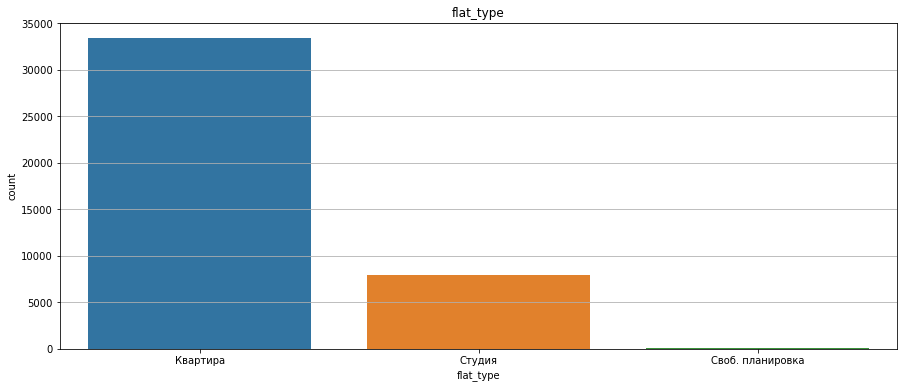

In [229]:
feature_analyse(flats.flat_type, stat=True)

## object_type

Новостройка: 28110 / 64.28%
Вторичная: 13314 / 30.44%


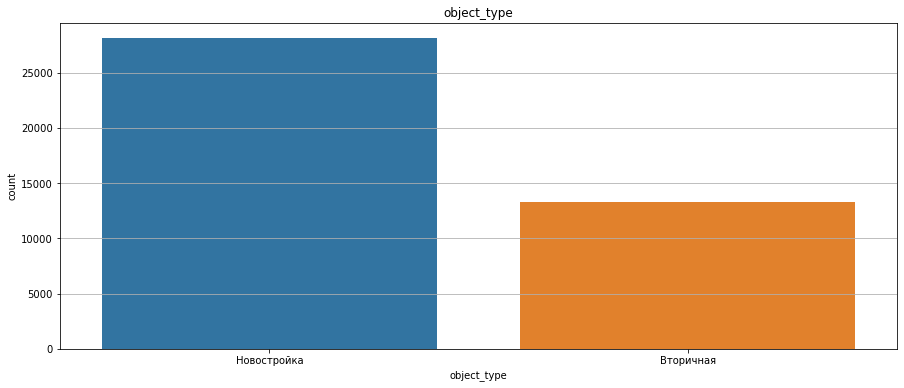

In [230]:
feature_analyse(flats.object_type, stat=True)

## rooms

4: 1653 / 3.78%
2: 11086 / 25.35%
1: 19943 / 45.6%
3: 8016 / 18.33%
5: 528 / 1.21%
Своб. планировка: 58 / 0.13%
7: 71 / 0.16%
8: 31 / 0.07%
9: 38 / 0.09%


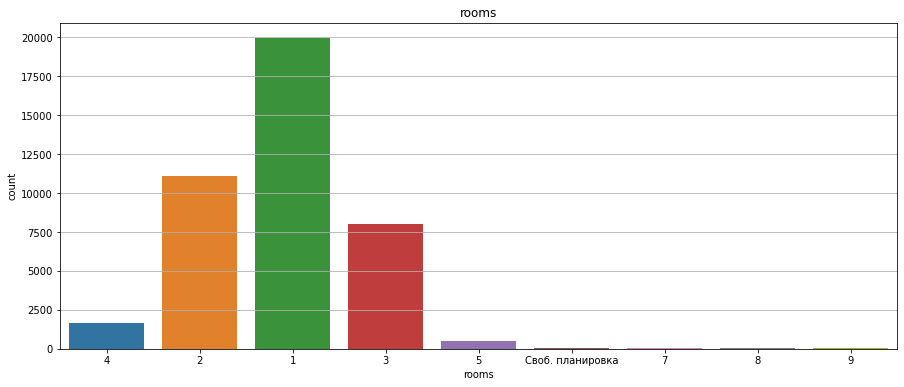

In [231]:
feature_analyse(flats.rooms, stat=True)

## floors

In [232]:
flats.floors = flats.floors.astype('object')

6: 2522 / 5.77%
11: 1685 / 3.85%
18: 717 / 1.64%
1: 2590 / 5.92%
10: 1943 / 4.44%
4: 3374 / 7.72%
9: 1934 / 4.42%
7: 2564 / 5.86%
3: 3775 / 8.63%
2: 4902 / 11.21%
15: 974 / 2.23%
8: 2315 / 5.29%
16: 857 / 1.96%
20: 572 / 1.31%
13: 1287 / 2.94%
5: 3526 / 8.06%
17: 822 / 1.88%
19: 604 / 1.38%
12: 1576 / 3.6%
21: 388 / 0.89%
23: 369 / 0.84%
22: 412 / 0.94%
14: 1157 / 2.65%
24: 330 / 0.75%
28: 12 / 0.03%
25: 147 / 0.34%
30: 1 / 0.0%
27: 28 / 0.06%
26: 34 / 0.08%
29: 5 / 0.01%
33: 2 / 0.0%


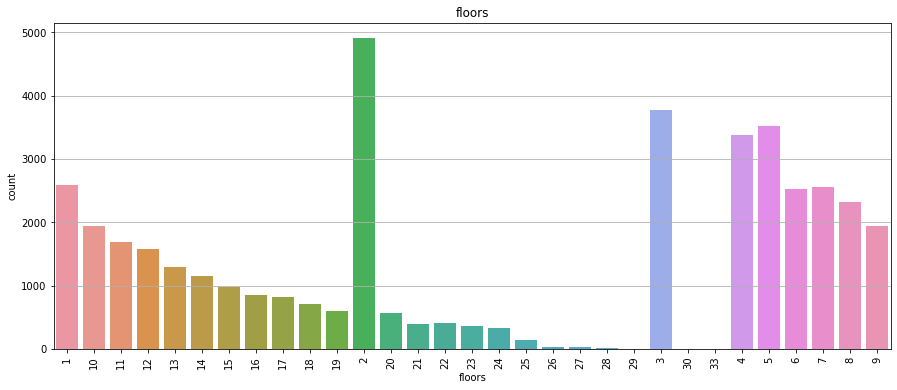

In [233]:
feature_analyse(flats.floors, stat=True)

Больше всего квартир продают на **втором** этаже.

## square

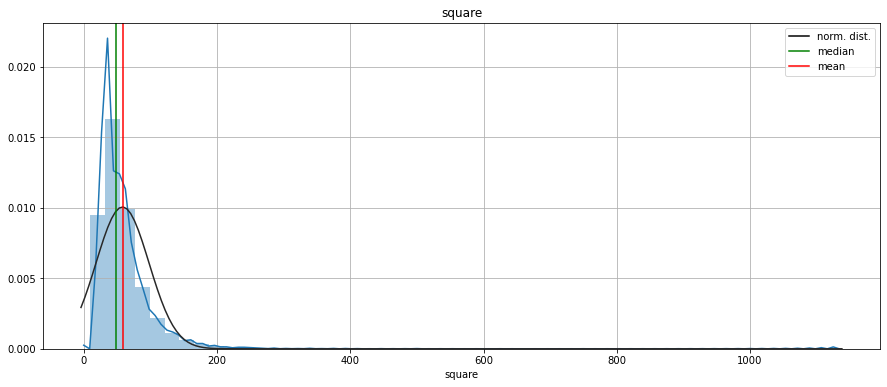

In [234]:
feature_analyse(flats.square, stat=True)

Попробую посмотреть на студии и квартиры по отдельности.

### Студия

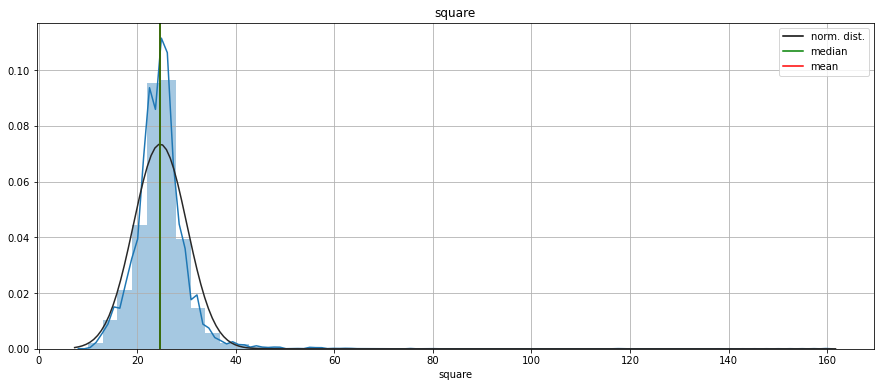

In [235]:
feature_analyse(flats.square[flats.flat_type == 'Студия'])

In [236]:
flats[(flats.flat_type == 'Студия') & (flats.square>60)]

,flat_type,object_type,rooms,floors,square,kitchen_square,live_square,price,build_matireal,catalog_id,district_rating,underground,total_floors,days_active,metro_station,district
1844,Студия,Вторичная,1,2,65.0,0.0,0.0,9300000.0,Кирпич,2710631629,"3,4",670.0,5,183.0,Площадь Восстания,Центральный
3805,Студия,Новостройка,1,12,79.5,0.0,0.0,5500000.0,Монолит,3057197174,"3,7",1600.0,13,31.0,Нарвская,Кировский
5446,Студия,Вторичная,1,1,117.8,0.0,0.0,17000000.0,Кирпич,3131695038,"4,0",597.0,5,0.0,Василеостровская,Ваcилеостровский
5551,Студия,Вторичная,1,2,63.0,0.0,0.0,9300000.0,Кирпич,2700943700,"3,4",647.0,4,184.0,Площадь Восстания,Центральный
5601,Студия,Вторичная,1,2,63.0,0.0,0.0,9300000.0,Кирпич,2778881268,"3,4",670.0,4,177.0,Площадь Восстания,Центральный
7113,Студия,Вторичная,1,13,61.6,0.0,0.0,8775000.0,Монолит,1987433272,"3,7",726.0,24,426.0,Московская,Московский
18667,Студия,Вторичная,1,2,159.0,0.0,0.0,13500000.0,Кирпич,2997524729,"3,7",396.0,6,54.0,Владимирская,Центральный
31002,Студия,Вторичная,1,1,75.5,0.0,0.0,2250000.0,Кирпич,3086753278,"3,7",519.0,6,5.0,Технологический ин-т II,Адмиралтейский
38728,Студия,Вторичная,1,11,62.0,0.0,0.0,8890000.0,Монолит,1988217943,"3,7",742.0,17,404.0,Московская,Московский


In [237]:
flats.square[(flats.flat_type == 'Студия')].describe()

count    7982.000000
mean       24.657592
std         5.430304
min        10.000000
25%        22.000000
50%        24.600000
75%        27.000000
max       159.000000
Name: square, dtype: float64

Студии с площадью 117 м2 и 159 м2 довольно редкое явление, а в отрыве от контекста вообще выглядитят как выброс. Удалю данное значение. Студия с площадью 75.5 м2 и стоимостью 2.250.000р так же выглядит очень старнно. Это можно было бы как то оправдать для строящегося дома, но в данном случае это вторичка. Либо ошибка при сборе или обработке данных, либо очень старрное обьявление. В любом случаи тоже выглядит как выброс.

In [238]:
flats.drop(labels=[5446, 18667], inplace=True)

In [239]:
flats.drop(labels=31002,inplace=True)

### Квартира

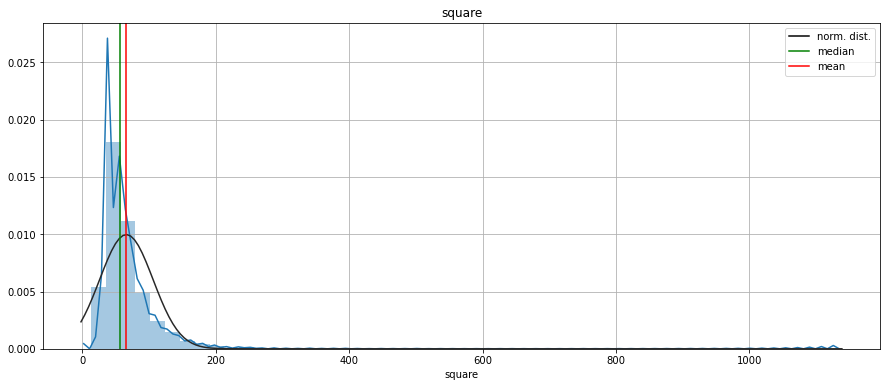

In [240]:
feature_analyse(flats.square[flats.flat_type == 'Квартира'])

In [241]:
flats[['square', 'price']][(flats.flat_type == 'Квартира') & (flats.square>200)].describe()

,square,price
count,401.000000,4.010000e+02
mean,276.315212,7.246506e+07
std,100.209072,6.612373e+07
min,200.300000,3.800000e+06
25%,219.000000,3.680000e+07
50%,242.200000,5.490000e+07
75%,289.000000,8.700000e+07
max,1123.700000,7.500000e+08


In [242]:
flats[(flats.flat_type == 'Квартира') & (flats.square>200) & (flats.price<16000000)]

,flat_type,object_type,rooms,floors,square,kitchen_square,live_square,price,build_matireal,catalog_id,district_rating,underground,total_floors,days_active,metro_station,district
2174,Квартира,Новостройка,1,7,361.3,10.0,NaN,6700000.0,Монолит,3063363204,"3,9",1200.0,12,30.0,Московская,Московский
6748,Квартира,Новостройка,3,16,1123.7,12.2,64.0,13040000.0,Монолит,3049531084,"3,6",1800.0,28,34.0,Проспект Просвещения,Выборгский
9261,Квартира,Вторичная,8,3,253.5,21.0,147.9,15500000.0,Кирпич,3049805869,"3,4",822.0,7,32.0,Чернышевская,Центральный
27726,Квартира,Вторичная,5,2,267.0,20.0,126.0,14720000.0,Монолит,2121102765,"3,8",4900.0,5,372.0,Сергиево (Володарская),Красносельский
31486,Квартира,Новостройка,1,5,333.0,10.6,14.7,5800000.0,Кирпич,3086494253,"3,9",1500.0,12,0.0,Удельная,Выборгский
39409,Квартира,Новостройка,1,1,328.5,10.6,14.4,3800000.0,Монолит,3073119541,"3,7",1100.0,8,0.0,Сергиево (Володарская),Красносельский
41357,Квартира,Вторичная,7,4,209.0,17.6,112.8,14500000.0,Кирпич,1824505609,"3,4",1600.0,5,450.0,Новочеркасская,Красногвардейский


- 328 м2, за 3.800.000р 
- 1123 м2 за 13.040.000р
- 361 м2 за 6.700.000р
- 333 м2 за 5.800.000р

Эти данные тоже выглядят очень странно. Слишком маленькая цена за такую площадь. Слишком нестандартный случай.

In [243]:
flats.drop(labels=[39409, 2174, 6748, 31486],inplace=True)

In [244]:
flats[(flats.flat_type == 'Квартира') & (flats.square>120)]

,flat_type,object_type,rooms,floors,square,kitchen_square,live_square,price,build_matireal,catalog_id,district_rating,underground,total_floors,days_active,metro_station,district
0,Квартира,Новостройка,4,6,157.0,37.4,73.7,68923000.0,Монолит,1671457770,"3,7",605.0,9,527.0,Чернышевская,Центральный
11,Квартира,Новостройка,3,1,155.6,17.8,57.6,32680200.0,Монолит,1712456860,"3,3",1000.0,9,514.0,Крестовский остров,Петроградский
13,Квартира,Вторичная,3,3,133.0,17.3,82.0,14000000.0,Кирпич,2959692173,"3,7",759.0,10,74.0,Купчино,Московский
19,Квартира,Вторичная,3,15,125.0,20.0,70.5,21400000.0,Монолит,2783147725,"3,7",725.0,24,150.0,Московская,Московский
31,Квартира,Вторичная,3,6,141.4,20.2,79.6,26300000.0,Кирпич,1909499913,"3,7",744.0,8,453.0,Московская,Московский
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41356,Квартира,Новостройка,4,3,128.0,18.0,75.0,17365050.0,Монолит,1478695267,"4,1",2300.0,18,569.0,Приморская,Ваcилеостровский
41357,Квартира,Вторичная,7,4,209.0,17.6,112.8,14500000.0,Кирпич,1824505609,"3,4",1600.0,5,450.0,Новочеркасская,Красногвардейский
41360,Квартира,Вторичная,3,2,121.3,33.4,53.9,27700000.0,Монолит,2856124804,"3,3",1200.0,8,91.0,Крестовский остров,Петроградский
41381,Квартира,Вторичная,4,7,144.0,NaN,NaN,46000000.0,Монолит,136826036,"3,7",1000.0,8,2243.0,Петроградская,Петроградский


In [245]:
flats[flats.flat_type == 'Квартира'].describe()

,square,kitchen_square,live_square,price,catalog_id,underground,days_active
count,33380.000000,26760.000000,27043.000000,3.338000e+04,3.338000e+04,33380.000000,33380.000000
mean,65.981456,15.030206,36.436194,1.183946e+07,2.699895e+09,1852.705333,160.944038
std,39.522181,7.902998,25.236905,1.401794e+07,6.270372e+08,1228.341214,243.111124
min,13.000000,2.000000,5.000000,1.107000e+06,6.261731e+06,0.000000,0.000000
25%,39.800000,10.200000,18.000000,5.800000e+06,2.661527e+09,924.000000,14.000000
50%,56.200000,13.700000,31.300000,8.180000e+06,2.952956e+09,1500.000000,66.000000
75%,77.200000,17.300000,45.700000,1.253071e+07,3.075763e+09,2700.000000,190.000000
max,994.200000,100.000000,485.000000,7.500000e+08,3.139191e+09,5000.000000,3006.000000


In [246]:
flats[(flats.flat_type == 'Квартира') & (flats.square<30)]

,flat_type,object_type,rooms,floors,square,kitchen_square,live_square,price,build_matireal,catalog_id,district_rating,underground,total_floors,days_active,metro_station,district
32,Квартира,Вторичная,1,1,16.7,3.4,8.2,3550000.0,Кирпич,3138715591,"3,6",700.0,5,0.0,Лесная,Выборгский
114,Квартира,Новостройка,1,2,25.0,NaN,17.5,6000000.0,Монолит,3138747136,"3,6",813.0,13,0.0,Лесная,Выборгский
115,Квартира,Новостройка,1,9,25.0,NaN,NaN,3500000.0,Монолит,3066642898,"3,7",1300.0,12,30.0,Сергиево (Володарская),Красносельский
138,Квартира,Новостройка,1,10,26.0,4.5,18.4,6360925.0,Монолит,2931492663,"4,0",1300.0,22,86.0,Звездная,Московский
159,Квартира,Вторичная,1,18,28.4,8.0,15.0,5700000.0,Монолит,3138850116,"3,8",3800.0,24,0.0,Комендантский проспект,Приморский
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40556,Квартира,Новостройка,1,5,18.4,NaN,15.5,3200000.0,Монолит,3069041559,"3,7",719.0,13,0.0,Черная речка,Приморский
41014,Квартира,Новостройка,1,10,29.1,8.8,12.0,5078635.0,Монолит,3068752445,"3,8",4400.0,13,0.0,Комендантский проспект,Приморский
41198,Квартира,Новостройка,1,3,26.4,NaN,NaN,4435200.0,Кирпич,2881385933,"3,7",358.0,7,104.0,Балтийская,Адмиралтейский
41204,Квартира,Вторичная,1,3,23.2,NaN,NaN,4252800.0,Кирпич,2878992742,"3,7",349.0,7,105.0,Балтийская,Адмиралтейский


994 м2 за 28.009.000р аналогично предыдущим.

In [247]:
flats.drop(labels=[6506],inplace=True)

## kitchen_square

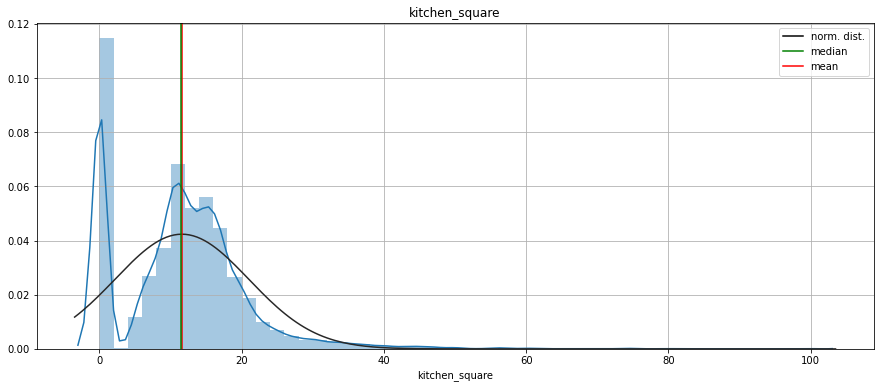

In [248]:
feature_analyse(flats.kitchen_square)

**0** это студии и свободная планировка.

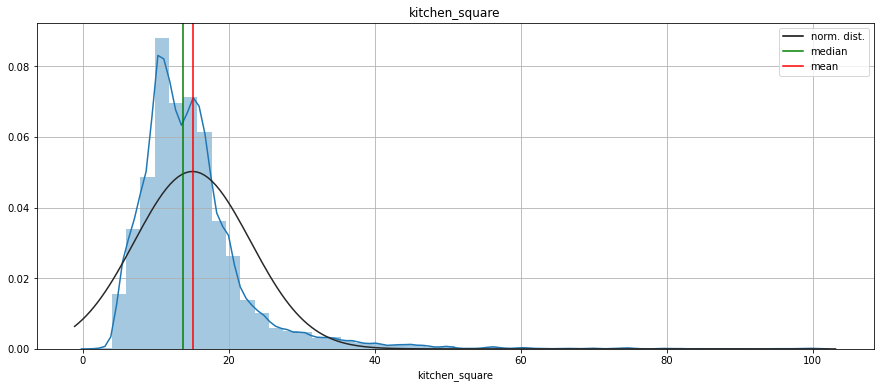

In [249]:
feature_analyse(flats.kitchen_square[flats.kitchen_square>0])

## live_square

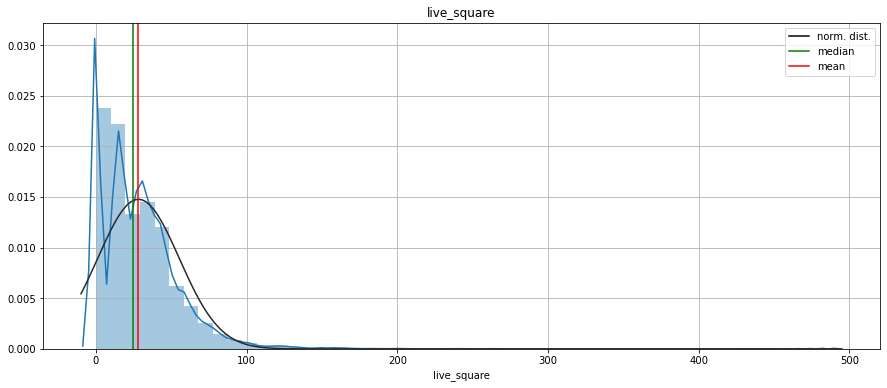

In [250]:
feature_analyse(flats.live_square)

Здесь **0** также является студиями.

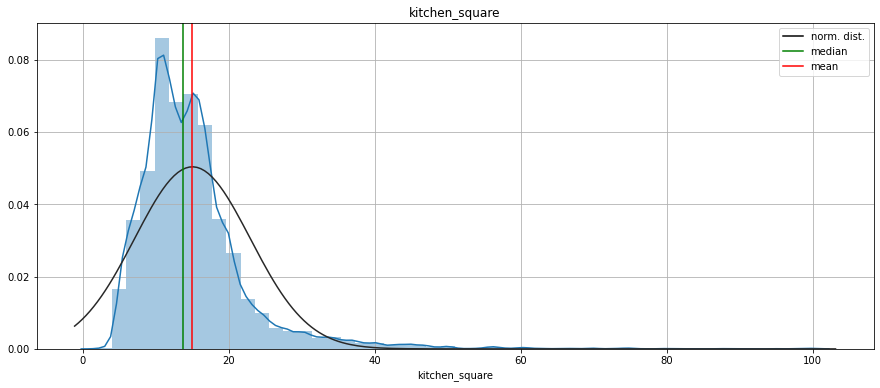

In [251]:
feature_analyse(flats.kitchen_square[flats.live_square>0])

## price

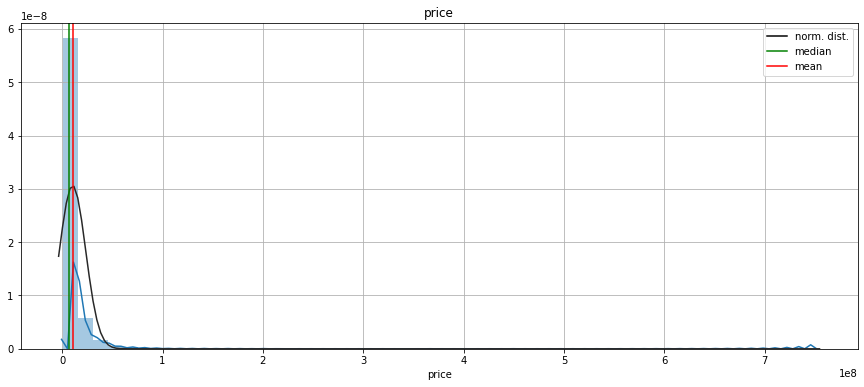

In [252]:
feature_analyse(flats.price)

In [253]:
flats[flats.price>20000000]

,flat_type,object_type,rooms,floors,square,kitchen_square,live_square,price,build_matireal,catalog_id,district_rating,underground,total_floors,days_active,metro_station,district
0,Квартира,Новостройка,4,6,157.0,37.4,73.7,68923000.0,Монолит,1671457770,"3,7",605.0,9,527.0,Чернышевская,Центральный
11,Квартира,Новостройка,3,1,155.6,17.8,57.6,32680200.0,Монолит,1712456860,"3,3",1000.0,9,514.0,Крестовский остров,Петроградский
12,Квартира,Новостройка,2,4,78.3,19.4,28.9,20038769.0,Монолит,3014861901,"3,7",364.0,8,52.0,Балтийская,Адмиралтейский
19,Квартира,Вторичная,3,15,125.0,20.0,70.5,21400000.0,Монолит,2783147725,"3,7",725.0,24,150.0,Московская,Московский
20,Квартира,Вторичная,4,8,116.9,28.2,51.4,35800000.0,Монолит,2853170947,"3,3",1300.0,8,121.0,Крестовский остров,Петроградский
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41381,Квартира,Вторичная,4,7,144.0,NaN,NaN,46000000.0,Монолит,136826036,"3,7",1000.0,8,2243.0,Петроградская,Петроградский
41400,Квартира,Вторичная,3,6,95.0,21.0,50.0,23100000.0,Монолит,2082576377,"3,7",1100.0,11,373.0,Приморская,Ваcилеостровский
41406,Квартира,Вторичная,3,6,85.0,13.0,51.0,26900000.0,Кирпич,2367743383,"3,7",672.0,7,296.0,Площадь Восстания,Центральный
41414,Квартира,Вторичная,3,16,142.3,23.4,73.3,20900000.0,Монолит,3070010554,"3,6",2800.0,16,7.0,Площадь Ленина,Калининский


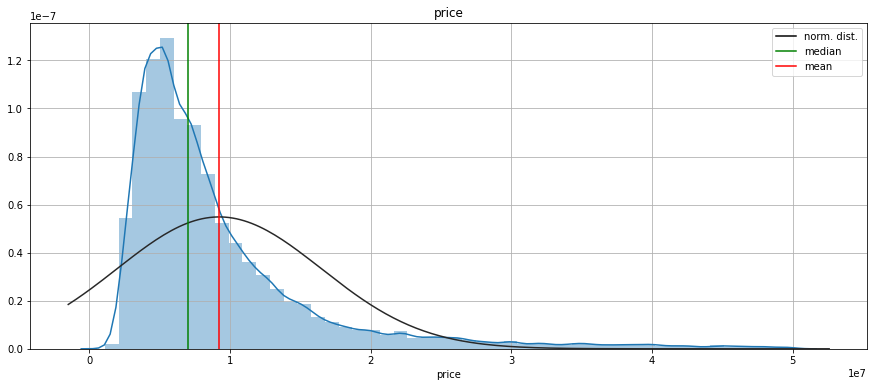

In [254]:
feature_analyse(flats.price[flats.price<50000000])

## build_matireal

Монолит: 22874 / 52.3%
Панель: 3033 / 6.94%
Кирпич: 15314 / 35.02%
Блоки: 190 / 0.43%
Дерево: 5 / 0.01%


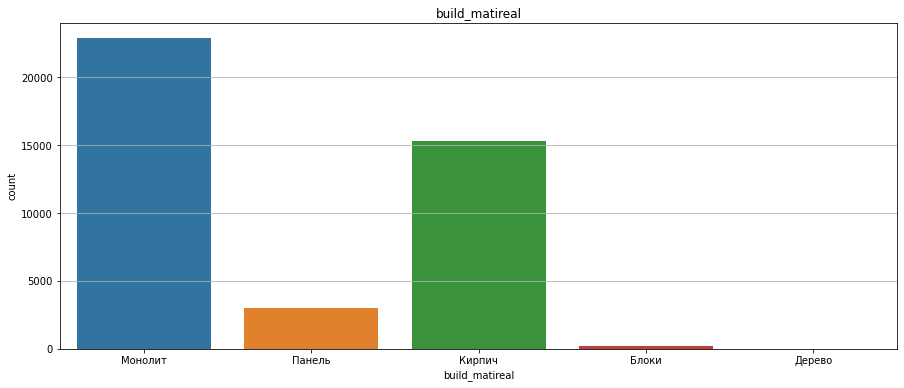

In [255]:
feature_analyse(flats.build_matireal, stat=True)

## catalog_id

Данный признак не несет в себе какой либо полезной информации, кроме разве что, в каком порядке обьявления были замещены на сайте. Для оценки того, как долго обьявление висит на сайт у меня есть отдельный признак, поэтому не вижу смысла использовать данный.

In [256]:
flats.drop(columns=['catalog_id'], inplace=True)

## district_rating

3,7: 16052 / 36.71%
4,0: 3782 / 8.65%
3,9: 4892 / 11.19%
3,6: 2644 / 6.05%
3,8: 5551 / 12.69%
3,3: 1201 / 2.75%
3,2: 2429 / 5.55%
4,1: 1137 / 2.6%
3,4: 1406 / 3.22%
3,5: 2322 / 5.31%


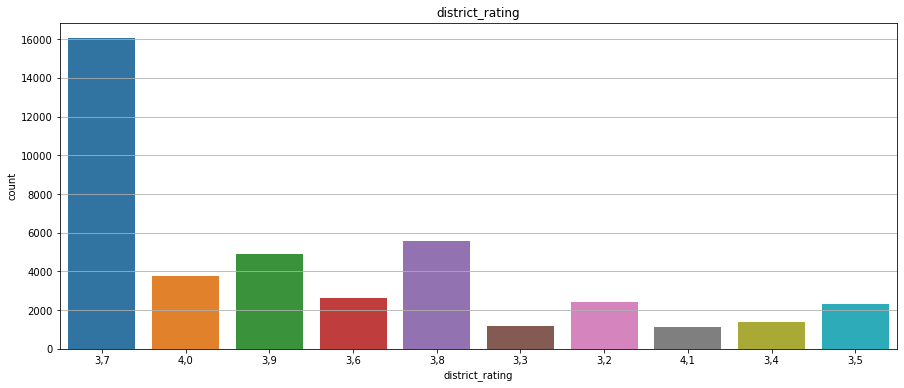

In [257]:
feature_analyse(flats.district_rating, stat=True)

В целом, так как у меня есть признак "район", то в данном признаке не вижу особого смысла. Пока оставлю, посмотрю как лучше при построении модели.

## underground

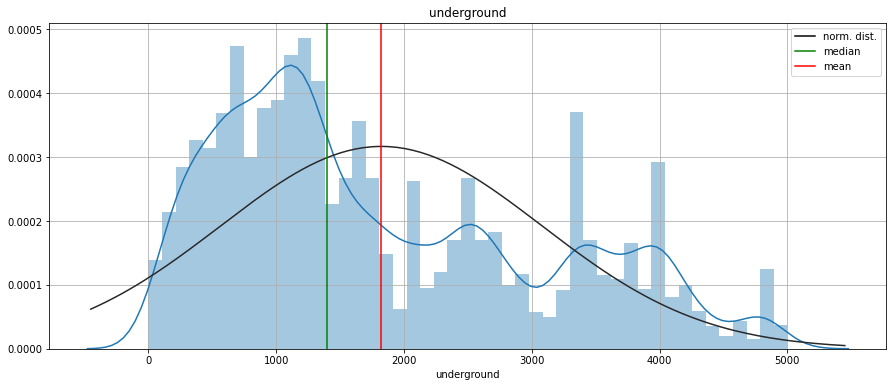

In [258]:
feature_analyse(flats.underground)

Распределение вообще не похоже на нормальное.

## total_floors

9: 2639 / 6.03%
12: 2794 / 6.39%
20: 2027 / 4.64%
5: 2635 / 6.03%
14: 2277 / 5.21%
10: 1455 / 3.33%
16: 1492 / 3.41%
11: 1124 / 2.57%
8: 1781 / 4.07%
15: 1732 / 3.96%
13: 2975 / 6.8%
24: 3183 / 7.28%
22: 1047 / 2.39%
25: 2759 / 6.31%
28: 88 / 0.2%
18: 2273 / 5.2%
4: 1094 / 2.5%
17: 1347 / 3.08%
7: 764 / 1.75%
19: 1207 / 2.76%
21: 663 / 1.52%
6: 1145 / 2.62%
26: 446 / 1.02%
23: 1271 / 2.91%
29: 244 / 0.56%
27: 544 / 1.24%
36: 3 / 0.01%
3: 267 / 0.61%
2: 98 / 0.22%
35: 12 / 0.03%
32: 11 / 0.03%
34: 2 / 0.0%
1: 4 / 0.01%
33: 1 / 0.0%
30: 10 / 0.02%
55: 1 / 0.0%
37: 1 / 0.0%


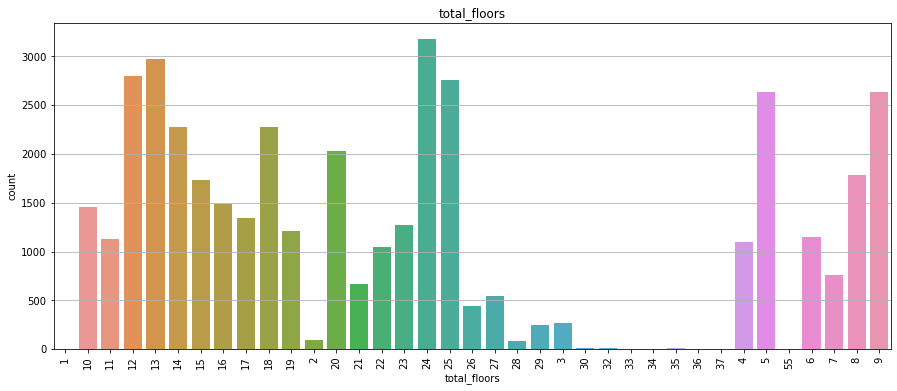

In [259]:
feature_analyse(flats.total_floors, stat=True)

## days_active

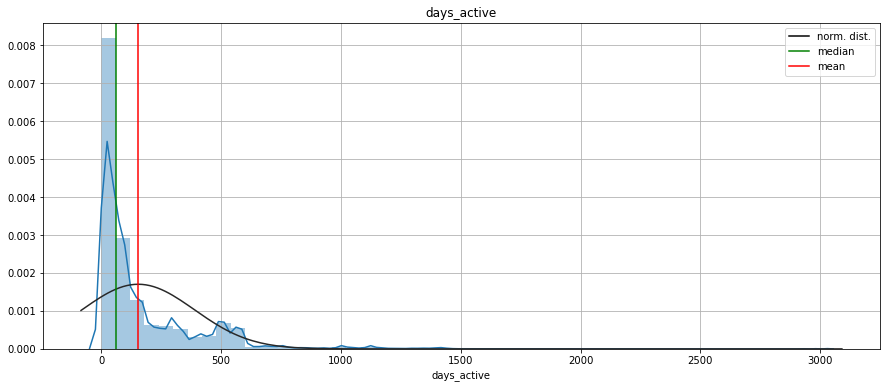

In [260]:
feature_analyse(flats.days_active)

В целом, если задача состоит в поиске более менее универсального решения (что логично), то от данного признака нет никакой пользы, так-как он имеет какую-либо ценность только для тех обьявлений, которые были собранны с определеного сайта.

In [261]:
flats.drop(columns=['days_active'], inplace=True)

## metro_station

Чернышевская: 480 / 1.1%
Звездная: 2011 / 4.6%
Комендантский проспект: 4005 / 9.16%
Обухово: 222 / 0.51%
Площадь Ленина: 622 / 1.42%
Площадь А. Невского: 276 / 0.63%
Лесная: 1495 / 3.42%
Купчино: 1351 / 3.09%
Московские ворота: 523 / 1.2%
Старая деревня: 335 / 0.77%
Удельная: 537 / 1.23%
Крестовский остров: 1140 / 2.61%
Балтийская: 465 / 1.06%
Академическая: 1631 / 3.73%
Елизаровская: 1897 / 4.34%
Московская: 1195 / 2.73%
Сергиево (Володарская): 794 / 1.82%
Озерки: 1009 / 2.31%
Сосновая Поляна: 941 / 2.15%
Проспект Просвещения: 1320 / 3.02%
Парк Победы: 257 / 0.59%
Василеостровская: 490 / 1.12%
Приморская: 1996 / 4.56%
Проспект Ветеранов: 615 / 1.41%
Пионерская: 373 / 0.85%
Гражданский проспект: 1023 / 2.34%
Бухарестская: 319 / 0.73%
Фрунзенская: 724 / 1.66%
Рыбацкое: 262 / 0.6%
Ладожская: 846 / 1.93%
Площадь Мужества: 317 / 0.72%
Площадь Восстания: 401 / 0.92%
Пролетарская: 1609 / 3.68%
Волковская: 127 / 0.29%
Черная речка: 948 / 2.17%
Выборгская: 331 / 0.76%
Обводный канал: 390 / 0.8

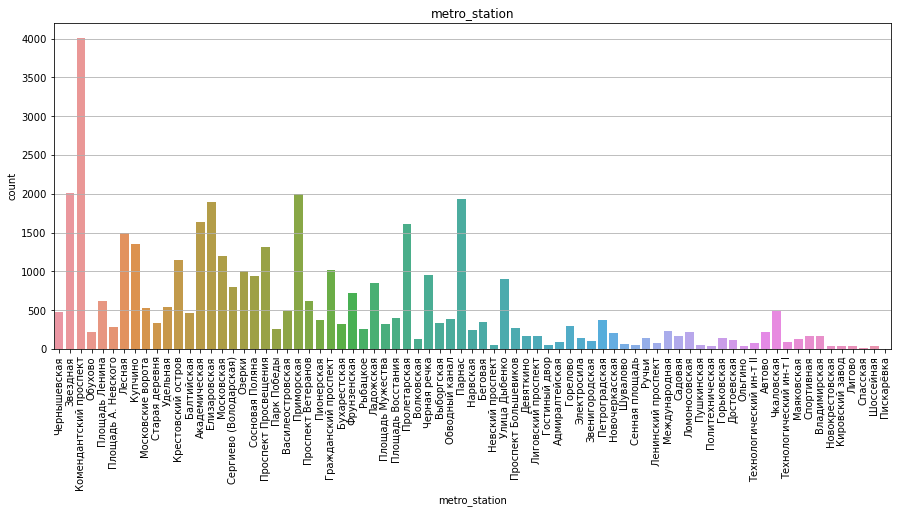

In [262]:
feature_analyse(flats.metro_station, stat=True)

## district

Центральный: 1921 / 4.39%
Московский: 5479 / 12.53%
Приморский: 6045 / 13.82%
Невский: 5379 / 12.3%
Калининский: 3771 / 8.62%
Выборгский: 6697 / 15.31%
Петроградский: 2335 / 5.34%
Адмиралтейский: 1747 / 3.99%
Красносельский: 2062 / 4.72%
Ваcилеостровский: 2486 / 5.68%
Кировский: 1182 / 2.7%
Фрунзенский: 1063 / 2.43%
Красногвардейский: 1052 / 2.41%
Всеволожский: 197 / 0.45%


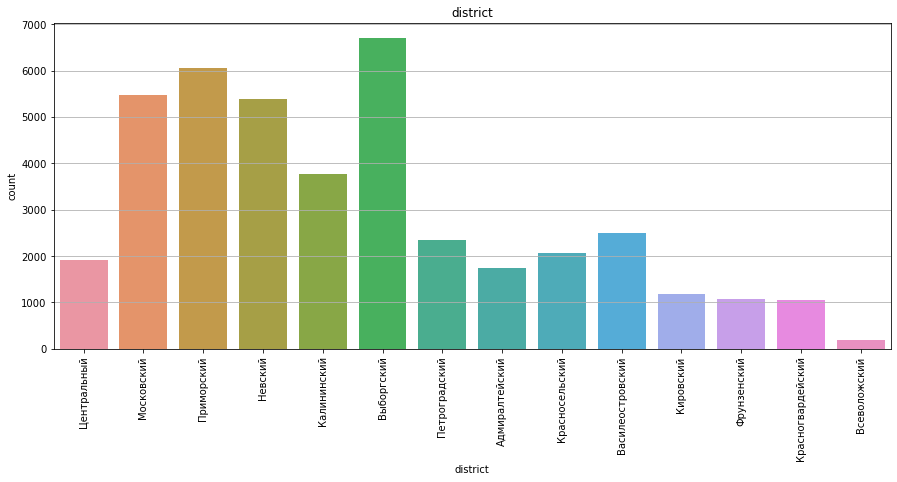

In [263]:
feature_analyse(flats.district, stat=True)

# ANALYSE

Теперь можно подумать что делать с данными дальше.

In [264]:
def remove_values(column, value):

    for i in flats[column == value].index:
        flats.drop(index=[i], inplace=True)

Процент квартир с свободной планировкой слишком мал (меньше **1%**) от всего объема данных. Сосредаточусь на обычных кваритрах и студиях.

In [265]:
remove_values(flats.rooms, 'Своб. планировка')

In [266]:
flats.flat_type.value_counts()

Квартира    33379
Студия       7979
Name: flat_type, dtype: int64

Процент квартир с 6-9 комнатами также очень мал (в сумме меньше **1%**). Избавлюсь от них тоже.

In [267]:
remove_values(flats.rooms, '7')

In [268]:
remove_values(flats.rooms, '8')

In [269]:
remove_values(flats.rooms, '9')

Квартир, которые находятся на 26, 27, 28, 29, 30, 33 очень мало. Это какие-то совсем экзотические, единичные варианты. Избавлюсь от них, чтобы было проще найти закономерности.

In [270]:
for i in ['26','27','28','29','30','33']:
    remove_values(flats.floors, i)

Дома из блоков и дерева так же очень мало, так же буду считать их экзотическими вариантами.

In [271]:
for i in ['Дерево','Блоки']:
    remove_values(flats.build_matireal, i)

Дома с количеством этажей 1, 2, 28, 30, 32, 33, 34, 35, 36, 37, 55 удаляем по тем же причинам. Избавимся от экзотических вариантов и сократим количество категорий признака.

In [272]:
for i in ['1', '2', '28', '30', '32', '33', '34', '35', '36', '37', '55']:
    remove_values(flats.total_floors, i)

## Categorical

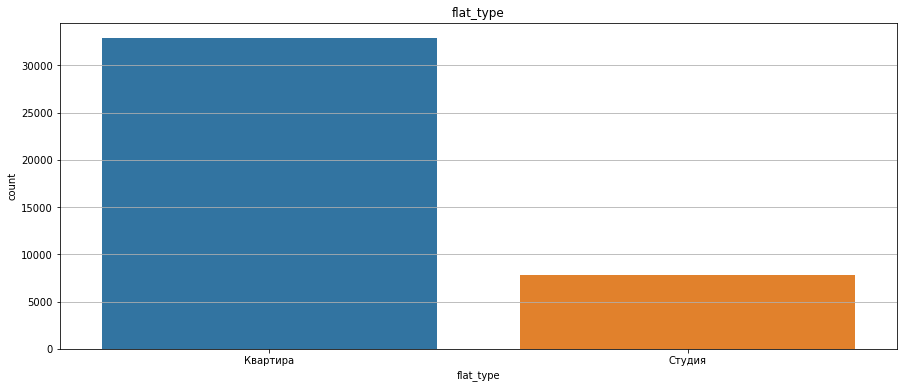

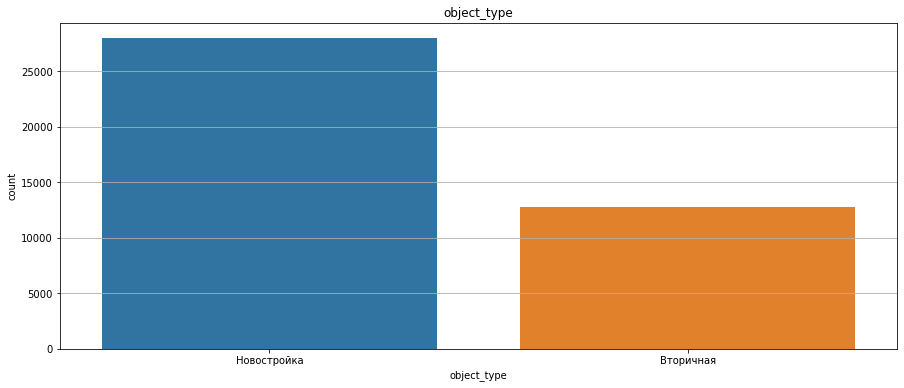

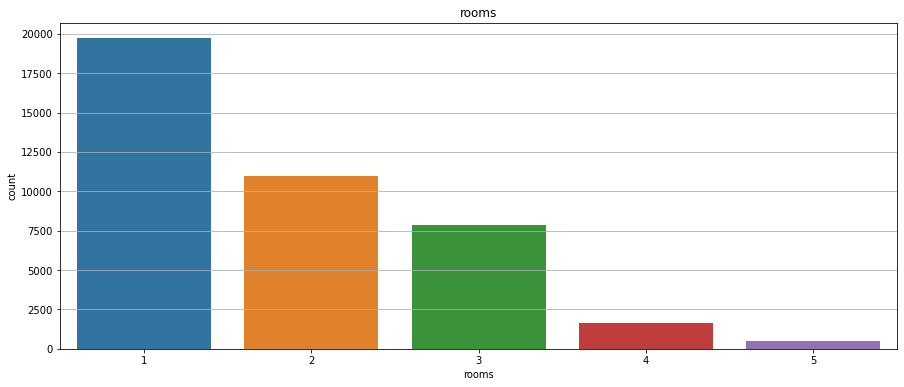

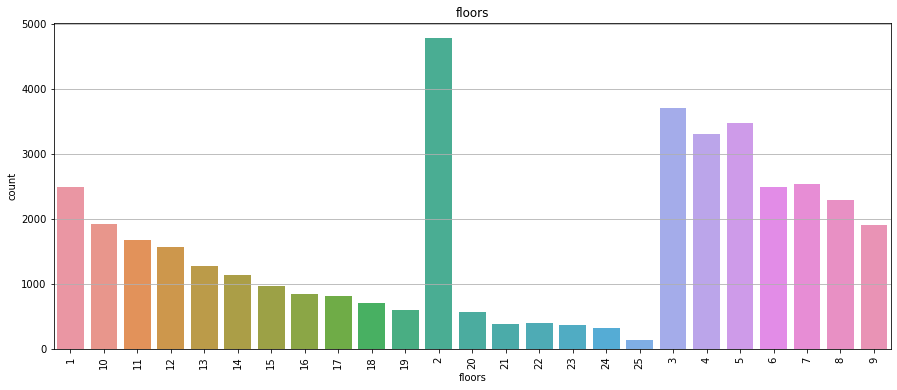

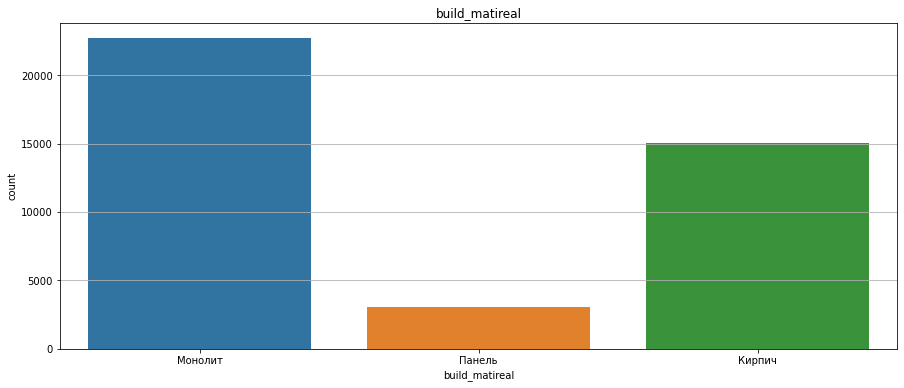

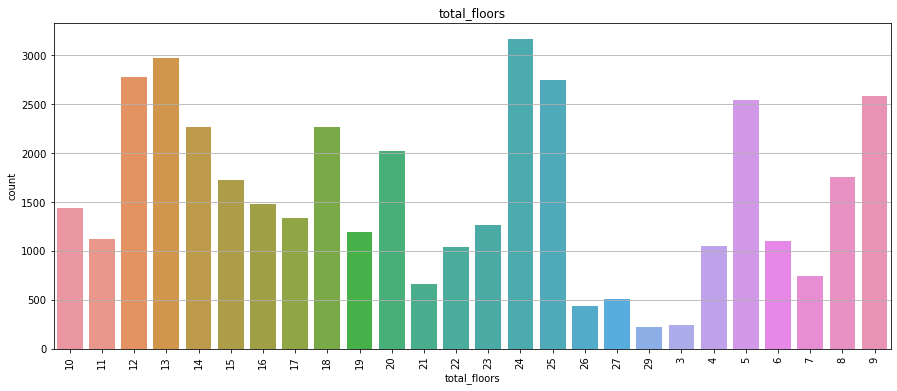

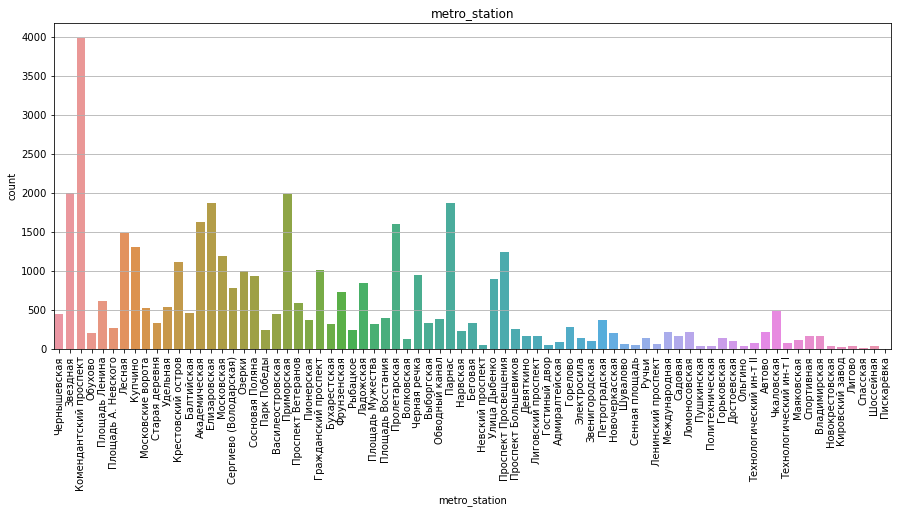

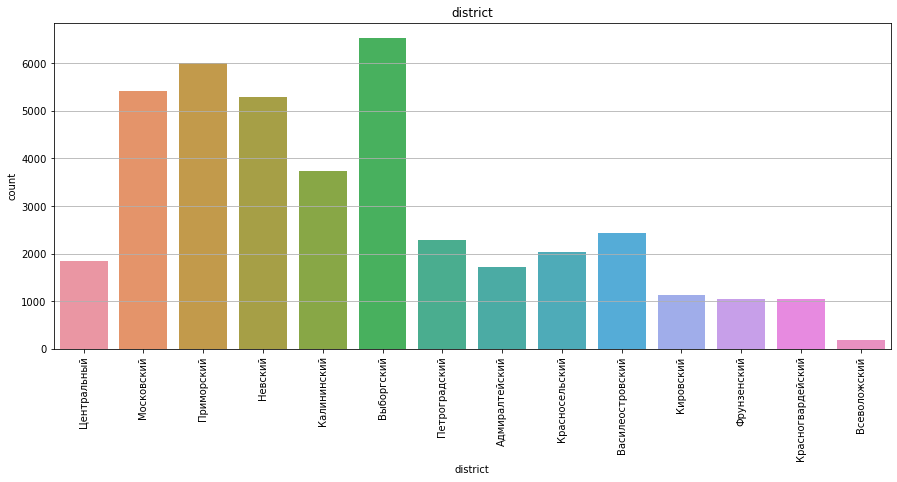

In [273]:
for column in [flats.flat_type, flats.object_type, flats.rooms,
                     flats.floors, flats.build_matireal, flats.total_floors, 
                     flats.metro_station, flats.district]:
    feature_analyse(column)

## Numeric

Объявления с очень большой площадью это либо целые этажы, либо очень дорого элитное жильные, т.е. единичные случаи. Для них сложно подобрать какую-либо закономерность. 

In [274]:
flats[flats.square<400].describe()

,square,kitchen_square,live_square,price,underground
count,40731.000000,34180.000000,34476.000000,4.073100e+04,40731.000000
mean,57.151636,11.570135,27.565013,1.016286e+07,1831.382264
std,35.424419,9.335151,24.866179,1.160303e+07,1262.450487
min,10.000000,0.000000,0.000000,1.107000e+06,0.000000
25%,34.000000,5.700000,10.700000,4.850000e+06,831.000000
50%,47.700000,11.500000,24.600000,7.042782e+06,1400.000000
75%,69.500000,16.100000,41.000000,1.100000e+07,2700.000000
max,396.600000,100.000000,335.500000,4.490000e+08,5000.000000


*UPDATE* после первого анализа данных решил оставить квартиры до 400 м2. Они поддаются логике и можно найти закономерности.

In [275]:
flats = flats[flats.square <= 400]

Жилай площадь и площадь в кухни в целом являются часть все площади квартиры. Логично предположить, что эти признаки будут сильно скоррелированы между собой. Пострю матрицу корреляции для наглядности.

In [276]:
square_price_corr = flats[['square', 'kitchen_square', 'live_square', 'price']].corr()

<AxesSubplot:>

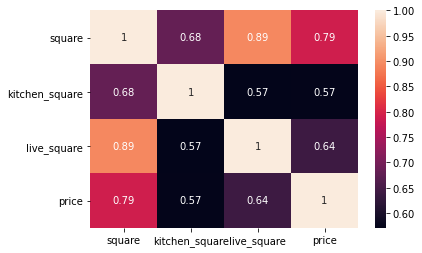

In [277]:
sns.heatmap(square_price_corr, annot=True)

Оставлю только признак `square`.

In [278]:
flats.drop(columns=['kitchen_square', 'live_square'], inplace=True)

Из числовых признаков остались `square` (общая площадь квартиры) и `underground` (удаленность от ближайщей станции метро). Построим для них корреляционному матрицу.

In [279]:
flats.corr()['price'].sort_values(ascending=False)

price          1.000000
square         0.791071
underground   -0.219230
Name: price, dtype: float64

<AxesSubplot:>

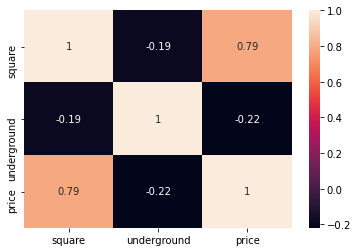

In [280]:
sns.heatmap(flats[['square', 'underground', 'price']].corr(), annot=True)

На основе матрици можно сделать следующие выводы:

- `squre` и `price` имеют сильную положительню корреляцию, т.е. чем больше площадь нашей квартиры тем она дороже. Звучит логично.
- `underground` и `price` имеют слабую отрицательную корреляцию, т.е. чем дальше квартира от метро тем она дешевле, но это влияет на итоговую цену не так сильно как площадь. Здесь тоже все выглядит логично.

Еще раз посмотрю на `price` после очистки данных.

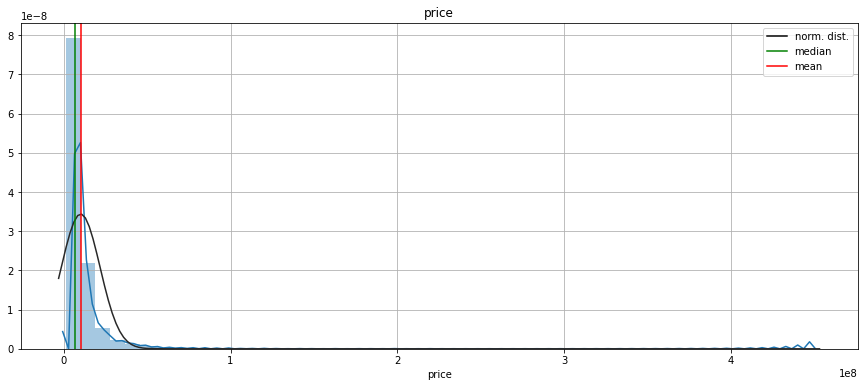

In [281]:
feature_analyse(flats.price)

Выглядит лучше. Это ассиметричное распределение. Хвост вытянут в сторону положительных значений. Самый простой способ получить нормельное распределение это взять логорифм.

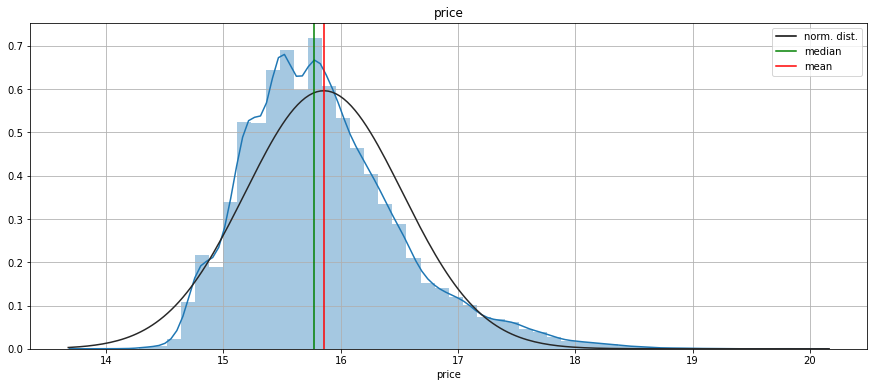

In [282]:
feature_analyse(np.log1p(flats.price))

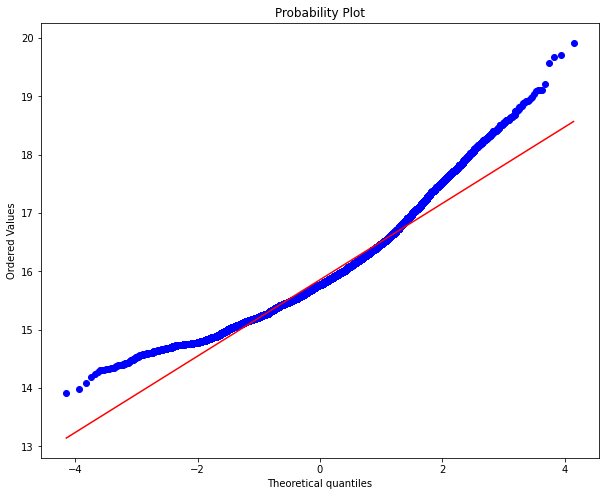

In [283]:
fig = plt.figure(figsize=(10,8))
res = stats.probplot(np.log1p(flats.price), plot=plt)

Это уже намного лучше и больше похоже на нормальное распределение.

Посмотрим на `square`.

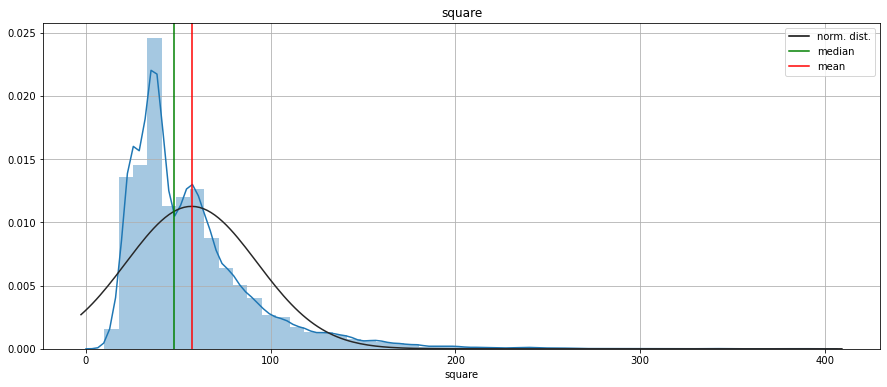

In [284]:
feature_analyse(flats.square)

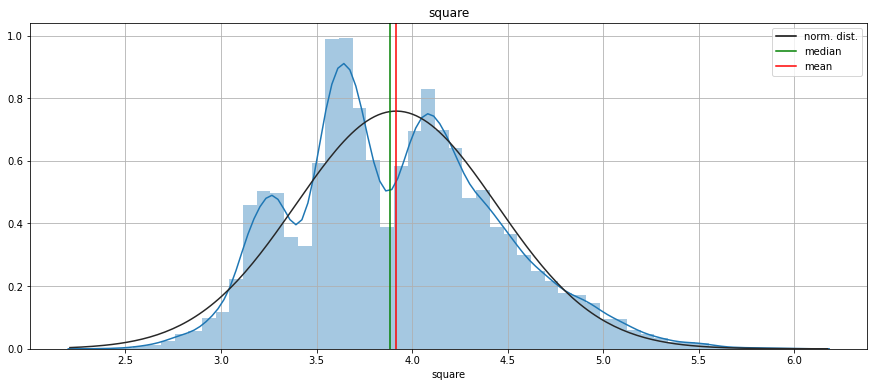

In [285]:
feature_analyse(np.log1p(flats.square))

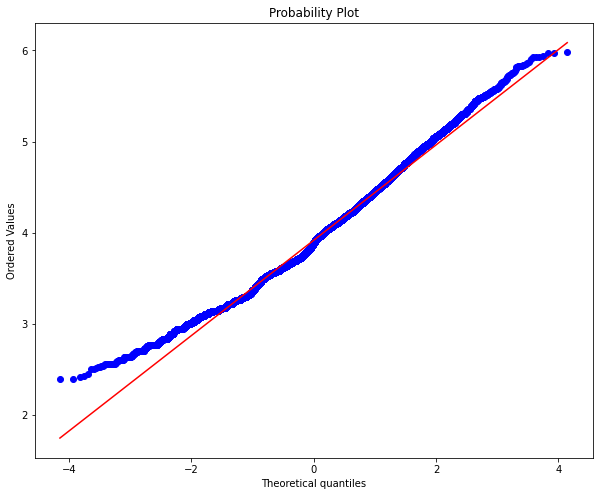

In [286]:
fig = plt.figure(figsize=(10,8))
res = stats.probplot(np.log1p(flats.square), plot=plt)

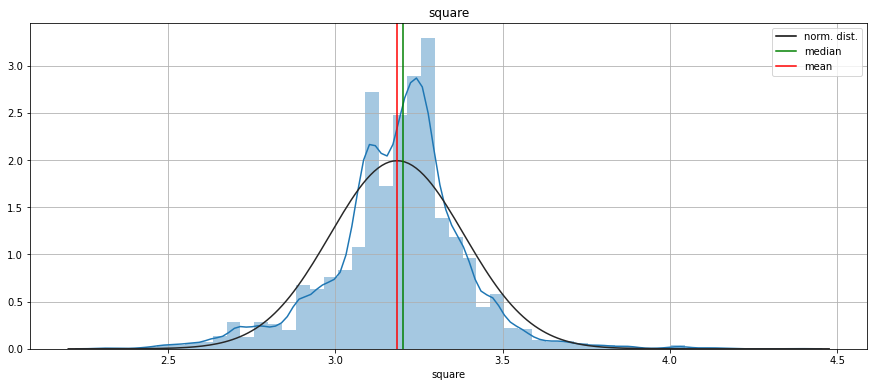

In [287]:
# Студии отдельно
feature_analyse(np.log(flats.square[flats.flat_type == 'Студия']))

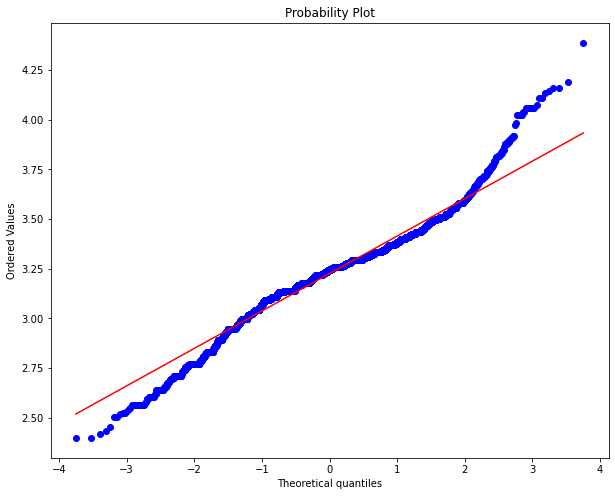

In [288]:
fig = plt.figure(figsize=(10,8))
res = stats.probplot(np.log1p(flats.square[flats.flat_type == 'Студия']), plot=plt)

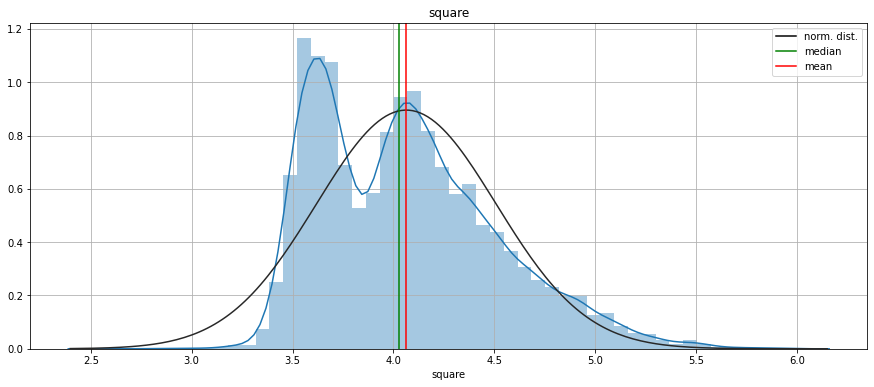

In [289]:
# Квартиры отдельно
feature_analyse(np.log(flats.square[flats.flat_type == 'Квартира']))

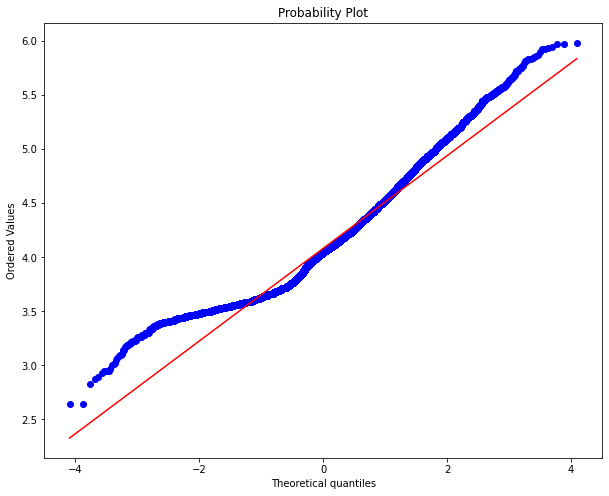

In [290]:
fig = plt.figure(figsize=(10,8))
res = stats.probplot(np.log1p(flats.square[flats.flat_type == 'Квартира']), plot=plt)

В этом случае получается нормально бимодальное распределение.

Посмотрим на то, как независимые признаки влияют на наш таргет.

### Студии

In [291]:
studio_flats = flats[flats.flat_type == 'Студия']

<Figure size 432x360 with 0 Axes>

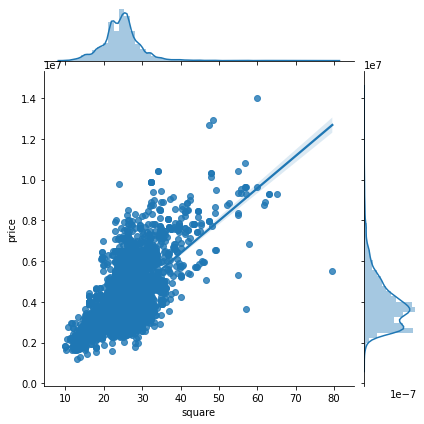

In [292]:
fig = plt.figure(figsize=(6, 5))
sns.jointplot(x=studio_flats.square[studio_flats.flat_type == 'Студия'],
              y=studio_flats.price,
              data=studio_flats,
              kind='reg')

Здесь можно заметить несколько сильно выделяющихся значений. Избавлюсь от них.

In [293]:
flats.drop(labels=flats[(flats.flat_type == 'Студия') & 
                        (flats.square > 50) & 
                        (flats.price < 6000000)].index, inplace=True)

In [294]:
flats.drop(labels=flats[(flats.flat_type == 'Студия') & 
                        (flats.square > 20) & 
                        (flats.price > 9000000)].index, inplace=True)

In [295]:
studio_flats = flats[flats.flat_type == 'Студия']

<Figure size 432x360 with 0 Axes>

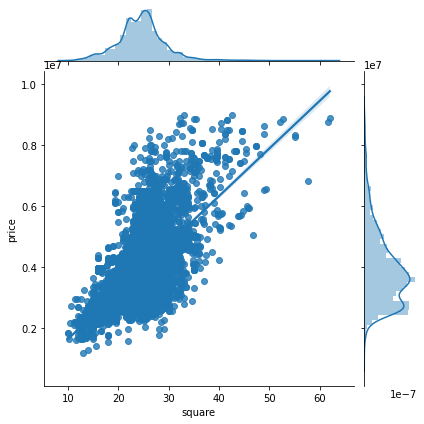

In [296]:
fig = plt.figure(figsize=(6, 5))
sns.jointplot(x=studio_flats.square[studio_flats.flat_type == 'Студия'],
              y=studio_flats.price,
              data=studio_flats,
              kind='reg')

<Figure size 432x360 with 0 Axes>

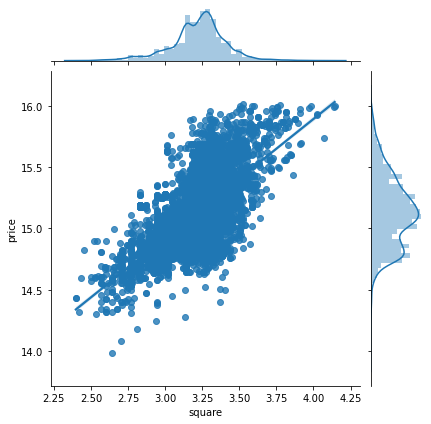

In [297]:
# После взятия логорифма
fig = plt.figure(figsize=(6, 5))
sns.jointplot(x=np.log1p(studio_flats.square[studio_flats.flat_type == 'Студия']),
              y=np.log1p(studio_flats.price),
              data=studio_flats,
              kind='reg')

Так лучше.

### Квартиры

Посмотрим тоже самое для квартир.

In [298]:
f_flats = flats[flats.flat_type == 'Квартира'] 

<Figure size 432x360 with 0 Axes>

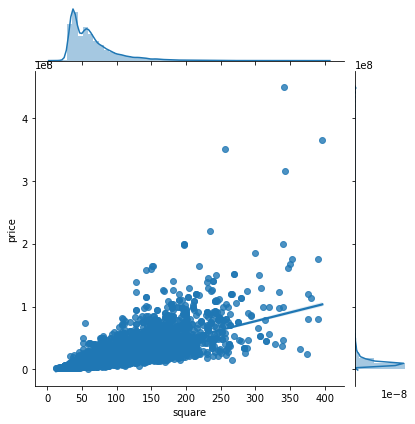

In [299]:
fig = plt.figure(figsize=(6, 5))
sns.jointplot(x=f_flats.square[f_flats.flat_type == 'Квартира'], 
              y=f_flats.price, 
              data=f_flats,
              kind='reg')

In [300]:
flats.drop(labels=flats[(flats.flat_type == 'Квартира') & 
                        (flats.square > 200) & 
                        (flats.price < 35000000)].index, inplace=True)

In [301]:
flats.drop(labels=flats[(flats.flat_type == 'Квартира') & 
                        (flats.square > 50) & 
                        (flats.price > 65000000)].index, inplace=True)

In [302]:
f_flats = flats[flats.flat_type == 'Квартира'] 

<Figure size 432x360 with 0 Axes>

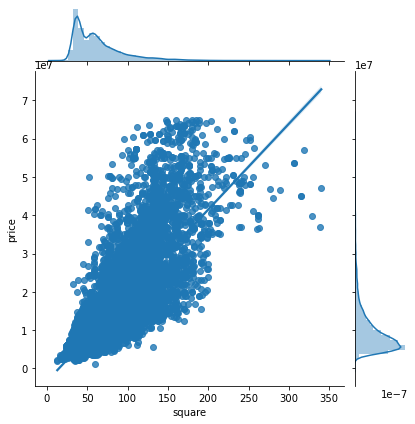

In [303]:
fig = plt.figure(figsize=(6, 5))
sns.jointplot(x=f_flats.square[f_flats.flat_type == 'Квартира'], 
              y=f_flats.price, 
              data=f_flats,
              kind='reg')

In [304]:
flats.drop(labels=flats[(flats.flat_type == 'Квартира') & 
                        (flats.square > 300) & 
                        (flats.price < 50000000)].index, inplace=True)

In [305]:
flats.drop(labels=flats[(flats.flat_type == 'Квартира') & 
                        (flats.square < 100) & 
                        (flats.price > 49000000)].index, inplace=True)

In [306]:
f_flats = flats[flats.flat_type == 'Квартира'] 

<Figure size 432x360 with 0 Axes>

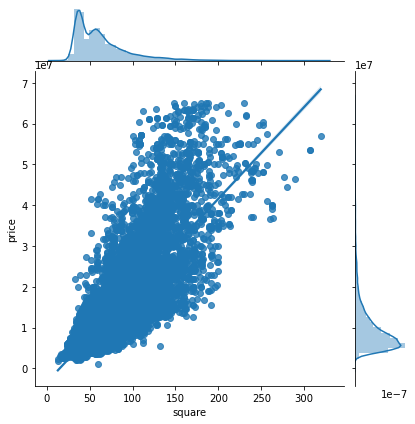

In [307]:
fig = plt.figure(figsize=(6, 5))
sns.jointplot(x=f_flats.square[f_flats.flat_type == 'Квартира'], 
              y=f_flats.price, 
              data=f_flats,
              kind='reg')

<Figure size 432x360 with 0 Axes>

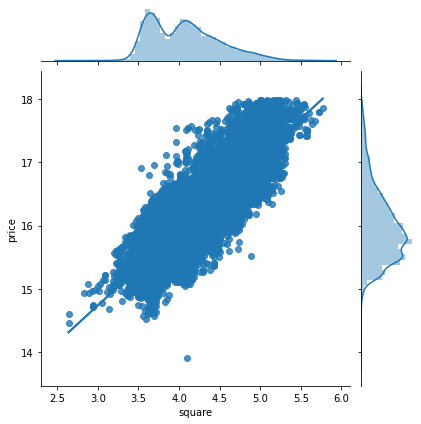

In [308]:
# После взятия логорифма
fig = plt.figure(figsize=(6, 5))
sns.jointplot(x=np.log1p(f_flats.square[f_flats.flat_type == 'Квартира']), 
              y=np.log1p(f_flats.price), 
              data=f_flats,
              kind='reg')

### Студии + Квартиры

<Figure size 432x360 with 0 Axes>

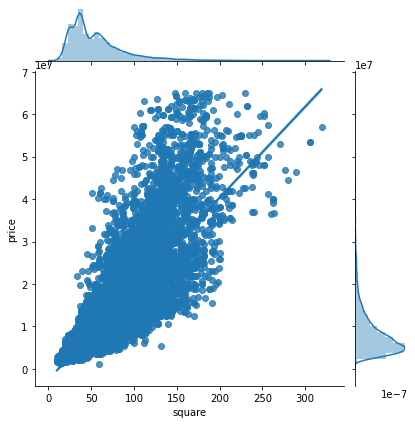

In [309]:
fig = plt.figure(figsize=(6, 5))
sns.jointplot(x=flats.square, 
              y=flats.price, 
              data=flats,
              kind='reg')

<Figure size 432x360 with 0 Axes>

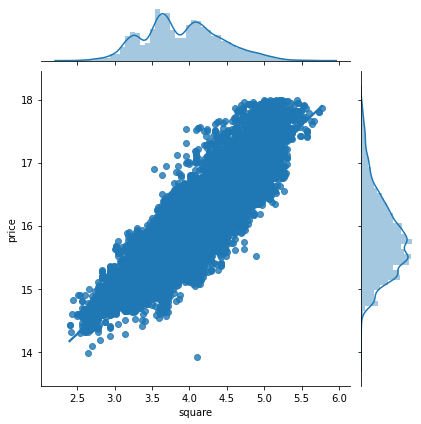

In [310]:
# После взятия логорифма
fig = plt.figure(figsize=(6, 5))
sns.jointplot(x=np.log1p(flats.square), 
              y=np.log1p(flats.price), 
              data=flats,
              kind='reg')

Удалю сильно выделяющиеся значение

In [311]:
flats['price'] = np.log1p(flats['price'])
flats['square'] = np.log1p(flats['square'])

In [312]:
flats.drop(labels = flats[(flats['square']>4) & (flats['price']<14)].index, inplace=True)

Теперь отчетливо видна линейная зависимость между признаком и таргетом

### Расстояние до метро

<Figure size 432x360 with 0 Axes>

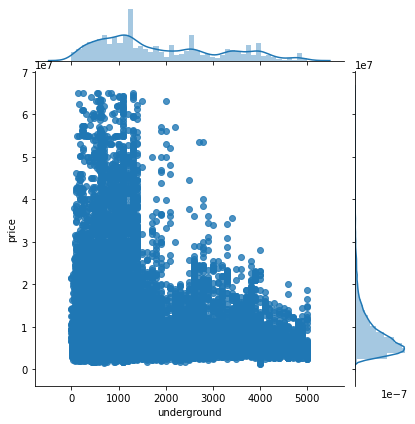

In [317]:
fig = plt.figure(figsize=(6, 5))
sns.jointplot(x=flats.underground, 
              y=np.expm1(flats.price), 
              data=flats,
              kind='reg')

Здесь линейная зависмость не наблюдается, но матрица корреляций говорит о отрицательной взаимосвязи. Пока оставлю этот признак, посмотрю как будет вести себя модель с ним и без.

Посмотрим еще раз на корреляционную матрицу.

<AxesSubplot:>

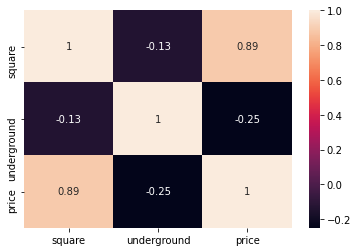

In [314]:
sns.heatmap(flats[['square', 'underground', 'price']].corr(), annot=True)

Стало лучше, связь между таргетом и независимыми переменными увеличилась.

In [315]:
flats

,flat_type,object_type,rooms,floors,square,price,build_matireal,district_rating,underground,total_floors,metro_station,district
1,Квартира,Новостройка,2,11,4.070735,16.359441,Монолит,"4,0",1000.0,12,Звездная,Московский
2,Квартира,Новостройка,1,18,3.908015,15.967274,Монолит,"3,9",3600.0,20,Комендантский проспект,Приморский
3,Квартира,Вторичная,3,1,4.146304,15.363073,Панель,"3,6",1000.0,5,Обухово,Невский
4,Квартира,Вторичная,1,10,3.941582,16.341239,Монолит,"3,8",2800.0,14,Площадь Ленина,Калининский
5,Квартира,Вторичная,1,6,3.931826,16.461685,Монолит,"3,7",797.0,10,Площадь А. Невского,Центральный
...,...,...,...,...,...,...,...,...,...,...,...,...
41419,Квартира,Вторичная,3,1,4.406719,16.092778,Кирпич,"3,9",256.0,5,Удельная,Выборгский
41420,Квартира,Вторичная,3,14,4.483003,16.418571,Монолит,"3,7",3600.0,17,Площадь Ленина,Калининский
41421,Квартира,Вторичная,1,5,3.797734,16.212496,Монолит,"3,7",877.0,12,Лиговский проспект,Центральный
41422,Квартира,Вторичная,2,18,4.204693,15.830414,Монолит,"3,8",4800.0,19,Сосновая Поляна,Красносельский


In [316]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40330 entries, 1 to 41423
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flat_type        40330 non-null  object 
 1   object_type      40330 non-null  object 
 2   rooms            40330 non-null  object 
 3   floors           40330 non-null  object 
 4   square           40330 non-null  float64
 5   price            40330 non-null  float64
 6   build_matireal   40330 non-null  object 
 7   district_rating  40330 non-null  object 
 8   underground      40330 non-null  float64
 9   total_floors     40330 non-null  object 
 10  metro_station    40330 non-null  object 
 11  district         40330 non-null  object 
dtypes: float64(3), object(9)
memory usage: 4.0+ MB
